<a href="https://colab.research.google.com/github/yxmauw/eye-disease-classification/blob/main/rm_img_bg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://imgur.com/1ZcRyrc.png" width="70" height="70" align="left" style="margin: 20px"> 
 # Remove image backgrounds

## Setting up local directory to work
Stream data direct from kaggle using Kaggle API

In [ ]:
# install kaggle API if never done before for your google account
# !pip install kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/yxmauw/eye-disease-classification.git

Cloning into 'eye-disease-classification'...
remote: Enumerating objects: 351, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 351 (delta 123), reused 128 (delta 73), pack-reused 134
Receiving objects: 100% (351/351), 61.94 MiB | 25.43 MiB/s, done.
Resolving deltas: 100% (200/200), done.


In [3]:
!mkdir ~/.kaggle #Make a directory named “.kaggle”

In [4]:
!cp ./eye-disease-classification/kaggle.json ~/.kaggle/ # Copy the “kaggle.json” into this new directory

In [5]:
!chmod 600 ~/.kaggle/kaggle.json # Allocate the required permission for this file

In [6]:
!kaggle datasets download gunavenkatdoddi/eye-diseases-classification # download dataset

100% 734M/736M [00:05<00:00, 136MB/s]
100% 736M/736M [00:05<00:00, 149MB/s]


In [ ]:
!unzip eye-diseases-classification.zip

## Explore images

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'

### Number of images in dataset:

In [9]:
import fnmatch
import os

# image files count
cataract_count = len(fnmatch.filter(os.listdir('./dataset/cataract'), '*.*'))
dre_count = len(fnmatch.filter(os.listdir('./dataset/diabetic_retinopathy'), '*.*'))
glaucoma_count = len(fnmatch.filter(os.listdir('./dataset/glaucoma'), '*.*'))
normal_count = len(fnmatch.filter(os.listdir('./dataset/normal'), '*.*'))
total_image_count = cataract_count + dre_count + \
                    glaucoma_count + normal_count
# print count
print('---Categories---')
print('Cataract:', cataract_count)
print('Diabetic retinopathy:', dre_count)
print('Glaucoma:', glaucoma_count)
print('Normal', normal_count)
print()
print('---Total image count---')
print(total_image_count)

---Categories---
Cataract: 1038
Diabetic retinopathy: 1098
Glaucoma: 1007
Normal 1074

---Total image count---
4217


### Image dimensions, properties:

In [ ]:
# load example image
from PIL import Image 
im = Image.open('./dataset/glaucoma/1495_left.jpg')
# summarize some details about the image
print(im.format)
print(im.mode)
print(im.size) # size already 512 x 512

pixels = np.asarray(im)
print(pixels[0])
print(pixels.shape) # 3 channel last

JPEG
RGB
(512, 512)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(512, 512, 3)


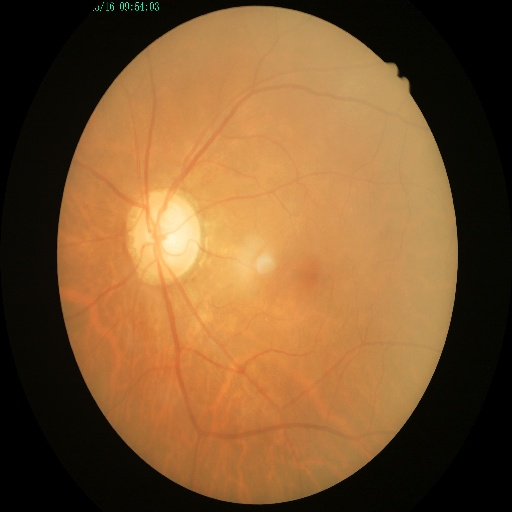

In [ ]:
#Import library
from IPython import display
display.Image(filename='./dataset/glaucoma/1495_left.jpg', width=200, height=150)

In [ ]:
# calculate image pixel mean, min, max

mean = pixels.mean()
print('Mean: %.3f' % mean)
# confirm pixel range is 0-255
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 86.173
Min: 0.000, Max: 255.000


## Function to remove background

In [10]:
# Import the library OpenCV
import cv2
from google.colab.patches import cv2_imshow # to stabilise cv2.imshow() function

In [38]:
def remove_bg(file): # file is individual image filepath in str
  img = cv2.imread(file)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret, alpha = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  
  b, g, r = cv2.split(img) # Using cv2.split() to split channels
  
  rgba = [b, g, r, alpha] # Making list of Red, Green, Blue channels and alpha

  new_img = cv2.merge(rgba, 4)

  # cv2_imshow(cv2.resize(new_img, (220, 150), interpolation=cv2.INTER_AREA))
  # if needed, save image
  # new file name
  
  # cv2.imwrite(f"./drive/MyDrive/Colab Notebooks/{file}.png", new_img) # jpg does not support alpha channel, only png or tiff format
  return new_img

In [ ]:
remove_bg()[0] # this image has 4 channels

## Function to loop through image files, save to a different directory

[Reference](https://stackoverflow.com/questions/56311318/how-to-save-images-in-a-folder-with-for-loop)

In [39]:
import glob
from PIL import Image
# import os

In [62]:
def transform_img(images): # remove background of all images in dataset
  for image in images:
    # put operating function here
    new_img = remove_bg(image)

    # set up new save location
    image_path_and_name = os.path.split(image) # directory + filename.ext tuple
    new_dir = image_path_and_name[0].replace('./', '') # remove ./
    image_name_and_ext = os.path.splitext(image_path_and_name[1]) # split filename + ext tuple
    name = image_name_and_ext[0] + '.png' # replace ext
    file_path = os.path.join(new_dir, name) # join new directary path with filename

    # save image
    status = cv2.imwrite(os.path.join('./drive/MyDrive/Colab Notebooks', file_path), new_img)

    # if required to check status
    # print("Image written to file-system : ",status)

Transform cataract images

In [63]:
cataract_imgs = glob.glob("./dataset/cataract/*.*")
transform_img(images = cataract_imgs)

Transform diabetic neuropathy images

In [64]:
dre_imgs = glob.glob("./dataset/diabetic_retinopathy/*.*")
transform_img(images = dre_imgs)

Transform glaucoma images

In [65]:
glaucoma_imgs = glob.glob("./dataset/glaucoma/*.*")
transform_img(images = glaucoma_imgs)

Transform normal images

In [66]:
normal_imgs = glob.glob("./dataset/normal/*.*")
transform_img(images = normal_imgs)

Check dataset image count

In [67]:
# image files count
cataract_count = len(fnmatch.filter(os.listdir('./drive/MyDrive/Colab Notebooks/dataset/cataract'), '*.*'))
dre_count = len(fnmatch.filter(os.listdir('./drive/MyDrive/Colab Notebooks/dataset/diabetic_retinopathy'), '*.*'))
glaucoma_count = len(fnmatch.filter(os.listdir('./drive/MyDrive/Colab Notebooks/dataset/glaucoma'), '*.*'))
normal_count = len(fnmatch.filter(os.listdir('./drive/MyDrive/Colab Notebooks/dataset/normal'), '*.*'))
total_image_count = cataract_count + dre_count + \
                    glaucoma_count + normal_count
# print count
print('---Categories---')
print('Cataract:', cataract_count)
print('Diabetic retinopathy:', dre_count)
print('Glaucoma:', glaucoma_count)
print('Normal', normal_count)
print()
print('---Total image count---')
print(total_image_count)

---Categories---
Cataract: 1038
Diabetic retinopathy: 1098
Glaucoma: 1007
Normal 1074

---Total image count---
4217


Uploaded to [kaggle](https://www.kaggle.com/datasets/yxmauw/eye-disease-class-bg-rm)

[Using Kaggle API to upload](https://www.kaggle.com/docs/api#create-a-new-dataset)

Some of the images were poorly rendered by OpenCV algorithm with removing background due to poor source image contrast.

